In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
# Read CSV into pandas dataframe
gdp_and_health_df = pd.read_csv('Resources/gdp_health_per_cap.csv')


In [3]:
# Clean the DataFrame
gdp_health_clean = gdp_and_health_df.dropna(how='any')
gdp_health_clean.head(1)

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473


In [4]:
gdp_health_clean.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]'],
      dtype='object')

In [5]:
# Removing unwanted columns
gdp_health_reduced = gdp_health_clean[['Time', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]']]

gdp_health_reduced.head(1)

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,Australia,AUS,50192.957328,5337.97600331473


In [6]:
# Rename columns 
gdp_health_df = gdp_health_reduced.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (current international $)' , 
                                                   'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]' : 'Current health expenditure per capita, PPP (current international $)'})

# New DataFrame of most recent year with data available* 
#   (2021 has several countries with missing info)
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']

#gdp_health_df_2020

pd.unique(gdp_and_health_df['Country Name'])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States', 'Brazil', 'Chile', 'China',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russian Federation',
       'Slovenia', 'South Africa', 'Latvia', 'Costa Rica', 'Lithuania',
       'Colombia', 'Peru', 'Bulgaria', 'Croatia', 'Romania', 'Argentina',
       'Malta', 'Cyprus', nan], dtype=object)

In [7]:
# Re-cast series as float type
gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_4504\963506661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
C:\Users\chris\AppData\Local\Temp\ipykernel_4504\963506661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expendit

In [9]:
# New Data Frame without USA data to obtain comparable country average 
all_but_us_2020 = gdp_health_df_2020.loc[gdp_health_df['Country Name'] != "United States",:]
#all_but_us_2020

In [10]:
# Cast health expenditure coulmn as float for mean calculation
all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_4504\662946502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')


In [11]:
# Calculate average of health expenditure per Capita for most recent year data
#health_avg_2020 = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].mean()
#health_avg_2020

3721.5118186682143

In [12]:
# New DataFrame for 2020 year data
#gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']
#gdp_health_df_2020

In [13]:
# Sort values of 2020 data based on Health expenditure data
gdp_health_df_2020 = gdp_health_df_2020.sort_values(by='Current health expenditure per capita, PPP (current international $)')

# Reset index
gdp_health_df_2020 = gdp_health_df_2020.reset_index()

#gdp_health_df_2020

In [17]:
# 19 countries closest to USA in Health Expenditure per capita , PPP (current international $) - excluding USA
comparable_countries_reduced_2020 = all_but_us_2020.loc[all_but_us_2020['Current health expenditure per capita, PPP (current international $)']>= 4047.753611]

comparable_countries_reduced_2020

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $)","Current health expenditure per capita, PPP (current international $)"
102,2020,Australia,AUS,53066.490989,5929.983600
103,2020,Austria,AUT,57258.690227,6400.895378
104,2020,Belgium,BEL,54569.925385,5883.081420
105,2020,Canada,CAN,47226.365140,6049.902410
107,2020,Denmark,DNK,60832.158291,6350.520949
108,2020,Finland,FIN,52305.289311,4896.908506
109,2020,France,FRA,48134.959795,5740.382129
110,2020,Germany,DEU,56482.475634,7031.941977
113,2020,Iceland,ISL,54303.904169,5099.783790
114,2020,Ireland,IRL,93942.605747,6657.551647


In [18]:
# Calculate compartable country avergage of health expenditure per capita for 2020 
comp_health_avg_2020 = comparable_countries_reduced_2020["Current health expenditure per capita, PPP (current international $)"].mean()
comp_health_avg_2020

6048.235061063615

In [19]:
# Cast Health expenditure per capita column as float
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

In [21]:
# New DataFrame of comparable countries including USA
comparable_countries_2020 = gdp_health_df_2020.loc[gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)'] >= 4047.753611]

#comparable_countries_2020

In [22]:
# Add new row to new DataFrame: Comparable country average (for Health Expenditure per capita, PPP)
new_row = {'Time' : '2020' , 'Country Name' : 'Comparable Country Avg', 'Country Code' : 'AVG', 'Current health expenditure per capita, PPP (current international $)' : comp_health_avg_2020 }
comparable_countries_2020.loc[len(comparable_countries_2020)] = new_row

#comparable_countries_2020 

C:\Users\chris\AppData\Local\Temp\ipykernel_4504\3964646039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_countries_2020.loc[len(comparable_countries_2020)] = new_row


In [24]:
# Sort values of new DataFrame for barh figure
comparable_countries_2020 = comparable_countries_2020.sort_values(by='Current health expenditure per capita, PPP (current international $)')

#comparable_countries_2020

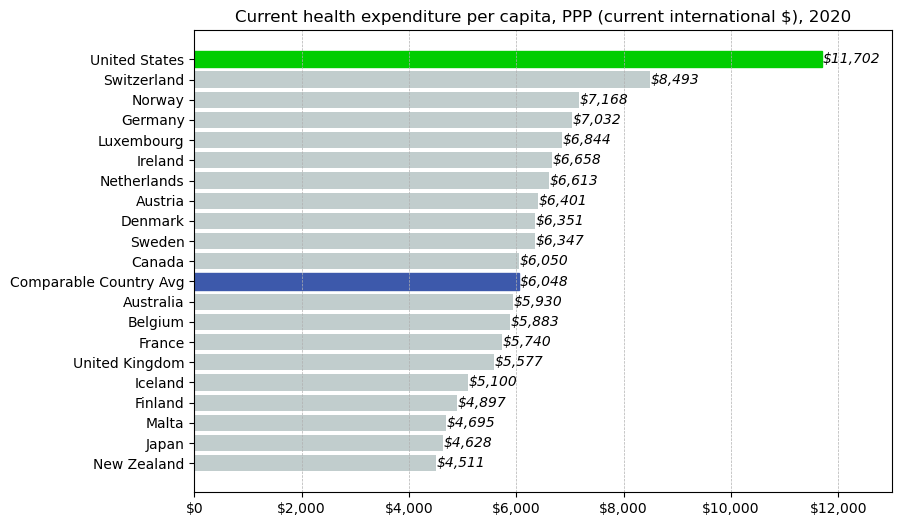

In [25]:
# Plot barh figure. // 19 COUNTRIES CLOSEST TO THE USA, USA & COMPARABLE COUNTRY AVERAGE
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
# Setting barh params , adding aesthetics
ret = ax1.barh(comparable_countries_2020['Country Name'], round(comparable_countries_2020['Current health expenditure per capita, PPP (current international $)'], 2), color='#C1CDCD')
ret[9].set_color('#3D59AB')
ret[20].set_color('#00CD00')

# Adding more aesthetics and annotations 
ax1.xaxis.grid(linestyle = '--', linewidth=0.5)
for pY, pX in enumerate(comparable_countries_2020['Current health expenditure per capita, PPP (current international $)']):
    ax1.annotate("${:,.0f}".format(pX) , xy=(pX+10, pY), fontstyle = 'italic' , va = 'center')

ax1.xaxis.set_major_formatter("${x:,.0f}")
ax1.set_xlim(0, 13000)
ax1.set_title("Current health expenditure per capita, PPP (current international $), 2020")

plt.show()